<a href="https://colab.research.google.com/github/adityanagachandra/aitraining/blob/main/EMC_S24_MNIST_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Project 1! You will be making your own CNN ; Convolution Neural Networks are used for image classification.

We will go into the specific on Wed and Fri but to get started:
1. Familiarize yourself with Google Collab
2. Setup Github Account, training slides for this are in the same folder
3. Work through this, step by step
4. Break the Model!

Your goal is to find digits, characters, could be ones you write or ones online that are MISCLASSIFIED by this model.

Post those examples along with the missclassified output on this week's "homework" by Sunday night.

Find atleast 3 such examples!

Onto the code, the way Collab works

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Normalize the images to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the images to include the channel dimension (1 for grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print("Data loaded and preprocessed successfully.")


11490434/11490434 [==============================] - 0s 0us/step
Data loaded and preprocessed successfully.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=3, batch_size=128, validation_split=0.2)

# Save the trained model
model.save('mnist_cnn.h5')

print("Model trained and saved successfully.")


Epoch 1/3
375/375 [==============================] - 37s 96ms/step - loss: 0.2497 - accuracy: 0.9279 - val_loss: 0.0796 - val_accuracy: 0.9781
Epoch 2/3
375/375 [==============================] - 35s 93ms/step - loss: 0.0681 - accuracy: 0.9789 - val_loss: 0.0636 - val_accuracy: 0.9808
Epoch 3/3
375/375 [==============================] - 38s 101ms/step - loss: 0.0487 - accuracy: 0.9848 - val_loss: 0.0472 - val_accuracy: 0.9858
Model trained and saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving Screenshot 2024-07-01 at 12.16.22 AM.png to Screenshot 2024-07-01 at 12.16.22 AM.png
User uploaded file "Screenshot 2024-07-01 at 12.16.22 AM.png" with length 36179 bytes


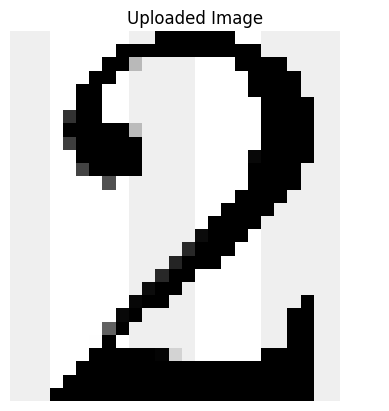

1/1 [==============================] - 0s 115ms/step
Predicted Label: 2


In [ ]:
# Import necessary libraries for image upload and classification
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model # Import load_model

# Function to upload an image
def upload_image():
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))
    return uploaded

# Load and preprocess the uploaded image
def load_and_preprocess_image(file_path):
    # Load the image
    img = load_img(file_path, color_mode='grayscale', target_size=(28, 28))
    img_array = img_to_array(img)

    # Normalize the image to the range [0, 1]
    img_array = img_array.astype('float32') / 255.0

    # Expand dimensions to match the model input shape
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension for grayscale
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    return img_array

# Function to classify the uploaded image
def classify_image(model, image):
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)
    return predicted_label

# Load the saved model
model = load_model('mnist_cnn.h5')

# Loop for uploading and classifying multiple images
while True:
    uploaded = upload_image()
    uploaded_file_path = list(uploaded.keys())[0]
    custom_image = load_and_preprocess_image(uploaded_file_path)

    # Display the uploaded image
    plt.imshow(custom_image[0, :, :, 0], cmap='gray')
    plt.title('Uploaded Image')
    plt.axis('off')
    plt.show()

    # Predict the label of the uploaded image
    predicted_label = classify_image(model, custom_image)
    print(f"Predicted Label: {predicted_label}")

    # Ask if the user wants to upload another image
    continue_uploading = input("Do you want to upload another image? (yes/no): ")
    if continue_uploading.lower() != 'yes':
        break
